In [1]:
cd /home/yuchen/pulse2percept

/home/yuchen/pulse2percept


In [2]:
import pulse2percept as p2p
from pulse2percept.implants import ArgusII
import shapes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import skimage
from skimage.measure import label, regionprops, regionprops_table
from pulse2percept.viz import plot_argus_phosphenes
import math
from statistics import mean
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
lst2 = []
for i in string.ascii_uppercase[0:6]: 
        for j in range(1,11):
            electrode = i + str(j)
            lst2.append(electrode)
lst2 = lst2[:-1]

lst3 = ['F1','F2','F4','F5','F6','F7','F8','F9','F10',
               'E1','E2','E3','E4','E5','E6','E7','E8','E9','E10', 
               'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10', 
               'C3','C4','C5','C6','C7','C8','C9','C10', 
               'B1','B3','B4','B5','B6','B7','B8','B9','B10', 
               'A1','A2','A3','A4','A5','A6','A7','A8','A9','A10']

lst4 = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10',
               'E1','E2','E3','E4','E5','E6','E7','E8','E9','E10', 
               'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10', 
               'C2','C3','C4','C5','C6','C7','C8','C9','C10', 
               'B3','B4','B5','B6','B7','B8','B9','B10', 
               'A3','A4','A5','A6','A7','A8','A9','A10']

In [4]:
data = shapes.load_shapes("/home/yuchen/shapes/data/shapes.h5", subjects=['12-005','51-009','52-001'],stim_class=None)

df_total = pd.DataFrame()
sub = ['12-005','51-009','52-001']
major = []
minor = []
perimeter = []
for i in range(len(data)):
    label_img = skimage.measure.label(data['image'][i]>0)
    regions = regionprops(label_img)
    props = regionprops_table(label_img, properties=('centroid',
                                                                         'orientation',
                                                                         'eccentricity',
                                                                         'major_axis_length',
                                                                         'minor_axis_length',
                                                                         'area',
                                                    'perimeter'))
    df_similar = pd.DataFrame(props).astype('object')
    major.append(sum(df_similar.iloc[:, 4].tolist()))
    minor.append(sum(df_similar.iloc[:, 5].tolist()))
    perimeter.append(sum(df_similar.iloc[:, 6].tolist()))
    

In [5]:
data['major'] = major
data['minor'] = minor
data['perimeter'] = perimeter

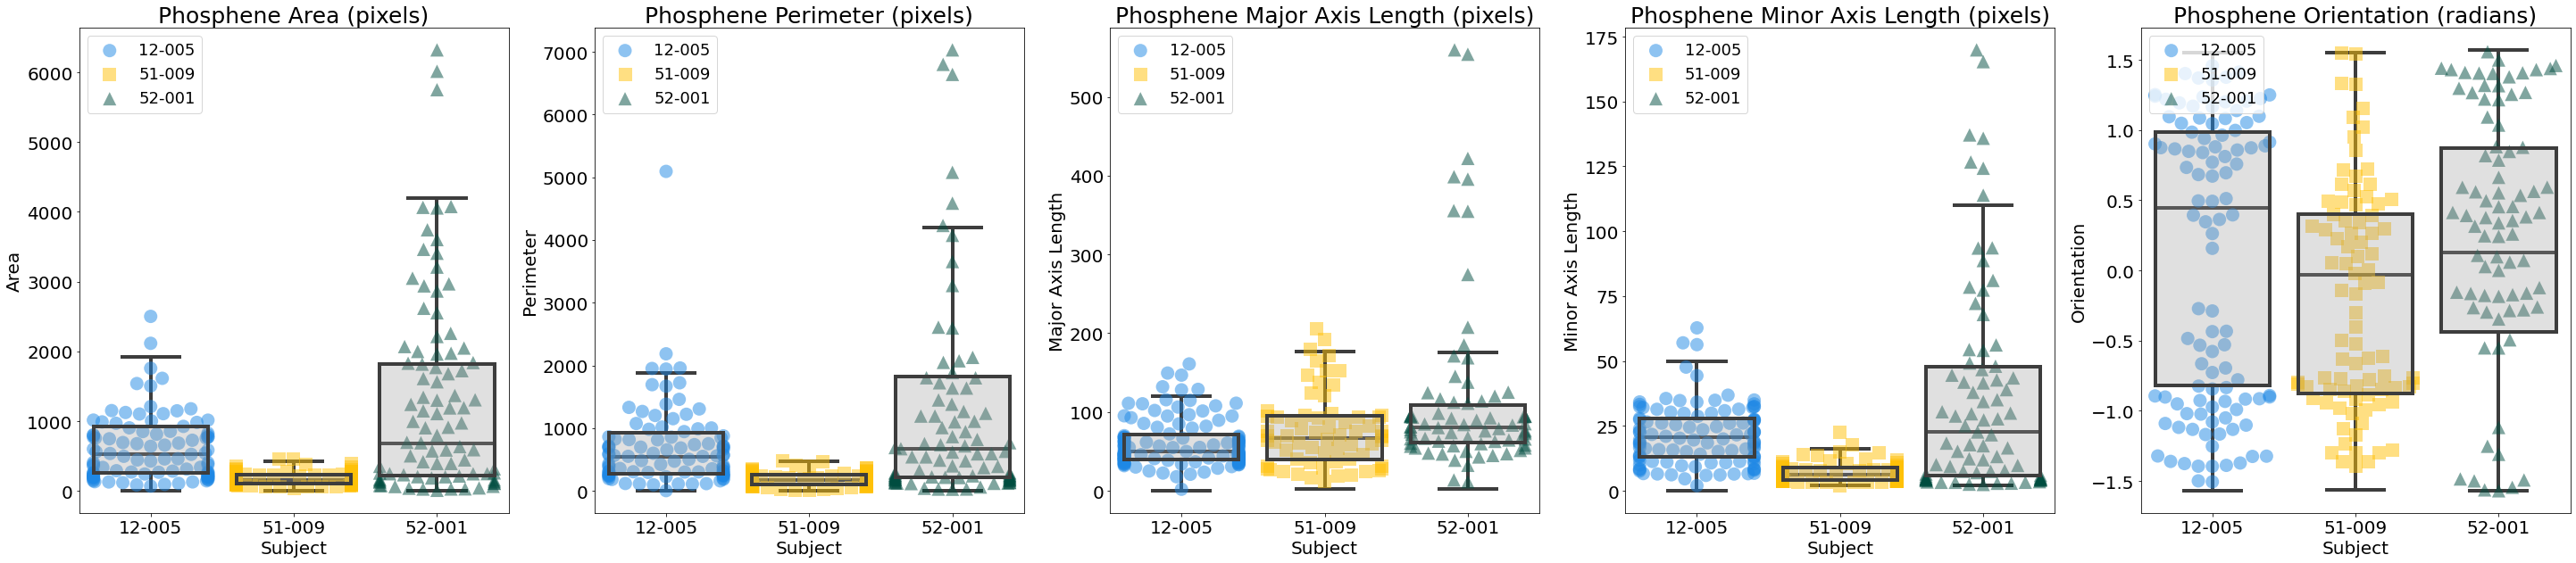

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,10))
a = axs[0].scatter([1,2],[3,4], marker='o')
b = axs[0].scatter([1,2],[3,4], marker='s')
c = axs[0].scatter([1,2],[3,4], marker='^')
mk1, = a.get_paths()
mk2, = b.get_paths()
mk3, = c.get_paths()
a.remove()
b.remove()
c.remove()

temp2 = data[(data.subject == '12-005') & (data.electrode2 == str())]
temp2 = temp2[temp2.electrode1.isin(lst2)]
temp3 = data[(data.subject == '51-009') & (data.electrode2 == str())]
temp3 = temp3[temp3.electrode1.isin(lst3)]
temp4 = data[(data.subject == '52-001') & (data.electrode2 == str())]
temp4 = temp4[temp4.electrode1.isin(lst4)]

temp1 = pd.concat([temp2,temp3,temp4])

sns.boxplot(x="subject", y="area", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False, ax=axs[0])
sns.swarmplot(x='subject', y="area", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[0])

sns.boxplot(x="subject", y="perimeter", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False,ax = axs[1])
sns.swarmplot(x='subject', y="perimeter", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[1])

sns.boxplot(x="subject", y="major", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False,ax = axs[2])
sns.swarmplot(x='subject', y="major", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[2])

sns.boxplot(x="subject", y="minor", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False,ax = axs[3])
sns.swarmplot(x='subject', y="minor", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[3])

sns.boxplot(x="subject", y="orientation", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False,ax = axs[4])
sns.swarmplot(x='subject', y="orientation", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[4])


for i in range(5):
    d = axs[i].collections
    for a in d[::3]:
        a.set_paths([mk1])
    for a in d[1::3]:
        a.set_paths([mk2])
    for a in d[2::3]:
        a.set_paths([mk3])
    axs[i].legend(d[-3:],['12-005', '51-009', '52-001'],loc='upper left',prop={'size': 18})
    for item in ([axs[i].xaxis.label, axs[i].yaxis.label]+axs[i].get_xticklabels()+axs[i].get_yticklabels()):
        item.set_fontsize(20)

axs[0].set_title('Phosphene Area (pixels)',size=25)
axs[0].set(xlabel='Subject',ylabel='Area')
axs[1].set_title('Phosphene Perimeter (pixels)',size=25)
axs[1].set(xlabel='Subject',ylabel='Perimeter')
axs[2].set_title('Phosphene Major Axis Length (pixels)',size=25)
axs[2].set(xlabel='Subject',ylabel='Major Axis Length')
axs[3].set_title('Phosphene Minor Axis Length (pixels)',size=25)
axs[3].set(xlabel='Subject',ylabel='Minor Axis Length')
axs[4].set_title('Phosphene Orientation (radians)',size=25)
axs[4].set(xlabel='Subject',ylabel='Orientation')

for patch in fig.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))
    
fig.savefig('/home/yuchen/paper/9a. Single-Electrode Swarmplot.pdf', transparent=True)

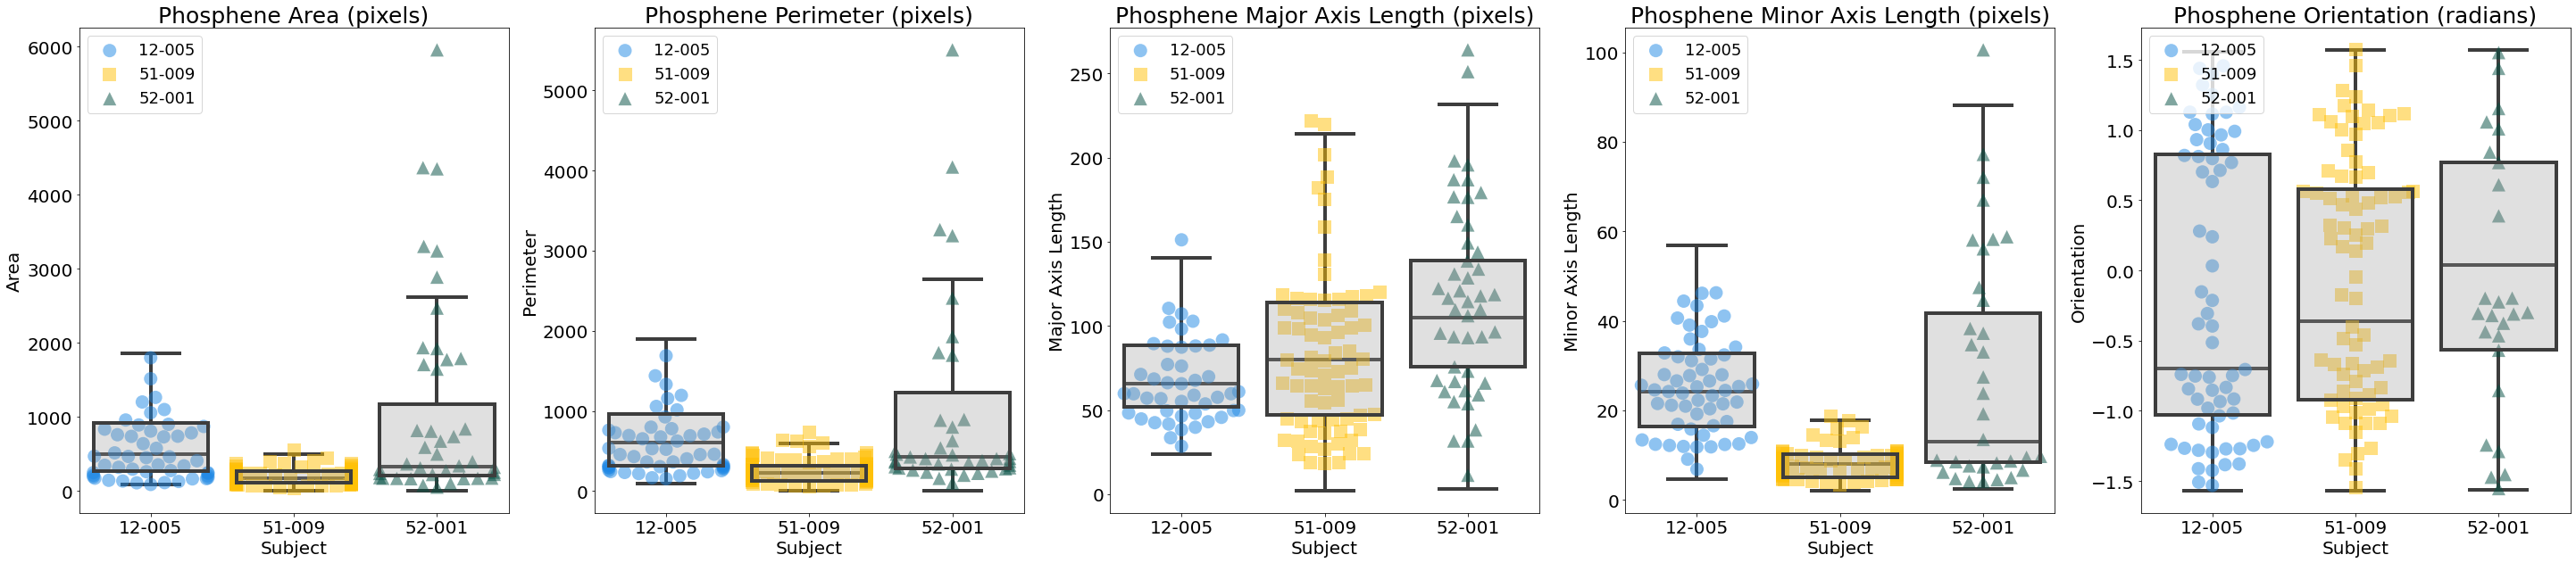

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,10))
a = axs[0].scatter([1,2],[3,4], marker='o')
b = axs[0].scatter([1,2],[3,4], marker='s')
c = axs[0].scatter([1,2],[3,4], marker='^')
mk1, = a.get_paths()
mk2, = b.get_paths()
mk3, = c.get_paths()
a.remove()
b.remove()
c.remove()

temp2 = data[(data.subject == '12-005') & (data.electrode2 != str())]
temp2 = temp2[temp2.electrode1.isin(lst2)]
temp3 = data[(data.subject == '51-009') & (data.electrode2 != str())]
temp3 = temp3[temp3.electrode1.isin(lst3)]
temp4 = data[(data.subject == '52-001') & (data.electrode2 != str())]
temp4 = temp4[temp4.electrode1.isin(lst4)]

temp1 = pd.concat([temp2,temp3,temp4])

sns.boxplot(x="subject", y="area", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False, ax=axs[0])
sns.swarmplot(x='subject', y="area", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[0])

sns.boxplot(x="subject", y="perimeter", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False,ax = axs[1])
sns.swarmplot(x='subject', y="perimeter", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[1])

sns.boxplot(x="subject", y="major", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False,ax = axs[2])
sns.swarmplot(x='subject', y="major", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[2])

sns.boxplot(x="subject", y="minor", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False,ax = axs[3])
sns.swarmplot(x='subject', y="minor", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[3])

sns.boxplot(x="subject", y="orientation", data=temp1,order=["12-005", "51-009","52-001"],boxprops={'facecolor':(0.6,0.6,0.6,.3), "zorder":10,'linewidth':4},whis=1.5,linewidth=4,showfliers=False,ax = axs[4])
sns.swarmplot(x='subject', y="orientation", data=temp1.sample(frac = 0.1),order=["12-005", "51-009","52-001"],palette=['#1E88E5', '#FFC107','#004D40'],alpha=0.5,size=15,ax = axs[4])



for i in range(5):
    d = axs[i].collections
    for a in d[::3]:
        a.set_paths([mk1])
    for a in d[1::3]:
        a.set_paths([mk2])
    for a in d[2::3]:
        a.set_paths([mk3])
    axs[i].legend(d[-3:],['12-005', '51-009', '52-001'],loc='upper left',prop={'size': 18})
    for item in ([axs[i].xaxis.label, axs[i].yaxis.label]+axs[i].get_xticklabels()+axs[i].get_yticklabels()):
        item.set_fontsize(20)

axs[0].set_title('Phosphene Area (pixels)',size=25)
axs[0].set(xlabel='Subject',ylabel='Area')
axs[1].set_title('Phosphene Perimeter (pixels)',size=25)
axs[1].set(xlabel='Subject',ylabel='Perimeter')
axs[2].set_title('Phosphene Major Axis Length (pixels)',size=25)
axs[2].set(xlabel='Subject',ylabel='Major Axis Length')
axs[3].set_title('Phosphene Minor Axis Length (pixels)',size=25)
axs[3].set(xlabel='Subject',ylabel='Minor Axis Length')
axs[4].set_title('Phosphene Orientation (radians)',size=25)
axs[4].set(xlabel='Subject',ylabel='Orientation')
fig.savefig('/home/yuchen/paper/9b. Double-Electrode Swarmplot.pdf', transparent=True)